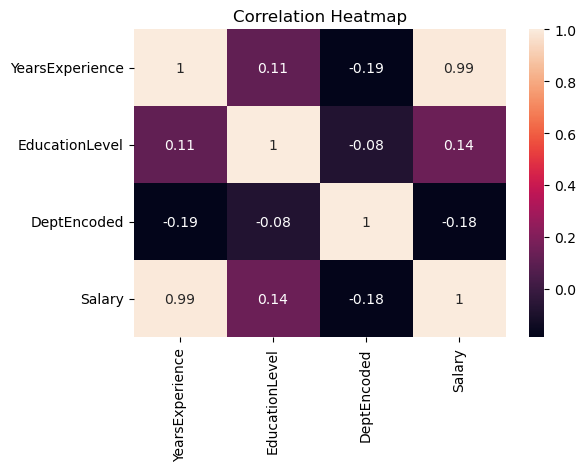

----- Random Forest -----
MAE: 2732.5
MSE: 11784175.0
R²: 0.9350734159779615

----- Linear Regression -----
MAE: 1814.3743522971818
MSE: 4361248.0890515465
R²: 0.9759710849088069

Random Forest CV Mean R²: 0.7572044730997736


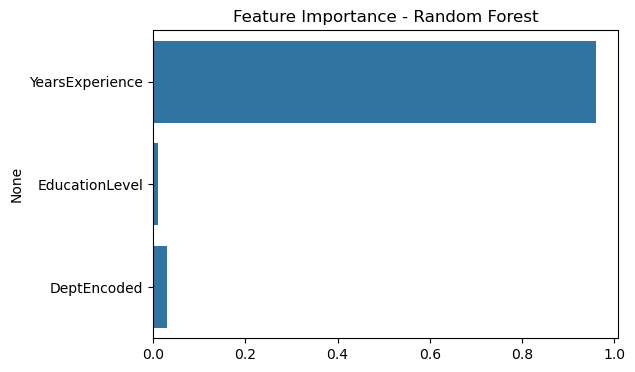

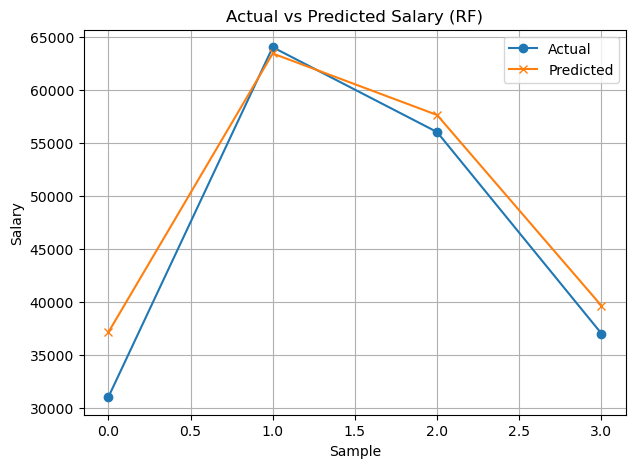

Model saved as salary_model_rf.pkl
Predicted salary for new employee: 47260


In [1]:
# STEP 1: IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

# STEP 2: CREATE MANUAL DATASET
data = {
    'Name': ['Amit', 'Priya', 'Rohit', 'Sneha', 'Karan',
             'Pooja', 'Vikas', 'Anjali', 'Ramesh', 'Neha',
             'Rahul', 'Meena', 'Suresh', 'Kavita', 'Deepak',
             'Ritu', 'Arjun', 'Tanya', 'Manish', 'Nisha'],
    'YearsExperience': [1.2, 2.5, 3.0, 4.2, 5.1,
                        6.0, 7.3, 8.5, 9.0, 10.1,
                        1.5, 2.7, 3.8, 4.0, 5.3,
                        6.7, 7.1, 8.2, 9.8, 10.5],
    'EducationLevel': [1, 2, 2, 3, 3,
                       1, 2, 3, 2, 1,
                       3, 1, 2, 2, 3,
                       1, 2, 3, 2, 3],
    'Department': ['HR', 'IT', 'Sales', 'IT', 'Finance',
                   'HR', 'IT', 'Sales', 'IT', 'Finance',
                   'HR', 'Sales', 'IT', 'Sales', 'Finance',
                   'IT', 'Sales', 'HR', 'Finance', 'IT'],
    'Salary': [31000, 37000, 42000, 47000, 52000,
               55000, 59000, 63000, 67000, 71000,
               33000, 39000, 44000, 48000, 53000,
               56000, 60000, 64000, 68000, 73000]
}
df = pd.DataFrame(data)

# STEP 3: PREPROCESSING
le = LabelEncoder()
df['DeptEncoded'] = le.fit_transform(df['Department'])

X = df[['YearsExperience', 'EducationLevel', 'DeptEncoded']]
y = df['Salary']

# Optional: View feature correlation
plt.figure(figsize=(6, 4))
sns.heatmap(df[['YearsExperience', 'EducationLevel', 'DeptEncoded', 'Salary']].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

# STEP 4: SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 5: TRAIN RANDOM FOREST MODEL
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# STEP 6: COMPARE WITH LINEAR REGRESSION
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# STEP 7: MODEL EVALUATION
def evaluate(name, y_true, y_pred):
    print(f"----- {name} -----")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("R²:", r2_score(y_true, y_pred))
    print()

evaluate("Random Forest", y_test, rf_preds)
evaluate("Linear Regression", y_test, lr_preds)

# STEP 8: CROSS VALIDATION (optional)
rf_scores = cross_val_score(rf_model, X, y, cv=5)
print("Random Forest CV Mean R²:", np.mean(rf_scores))

# STEP 9: VISUALIZE FEATURE IMPORTANCE
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.show()

# STEP 10: PLOT ACTUAL VS PREDICTED (RANDOM FOREST)
plt.figure(figsize=(7, 5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(rf_preds, label='Predicted', marker='x')
plt.title("Actual vs Predicted Salary (RF)")
plt.xlabel("Sample")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()

# STEP 11: SAVE MODEL
joblib.dump(rf_model, "salary_model_rf.pkl")
print("Model saved as salary_model_rf.pkl")

# STEP 12: PREDICT NEW SAMPLE
new_data = pd.DataFrame({
    'YearsExperience': [4.5],
    'EducationLevel': [2],
    'DeptEncoded': [le.transform(['IT'])[0]]
})

predicted = rf_model.predict(new_data)
print("Predicted salary for new employee:", round(predicted[0]))


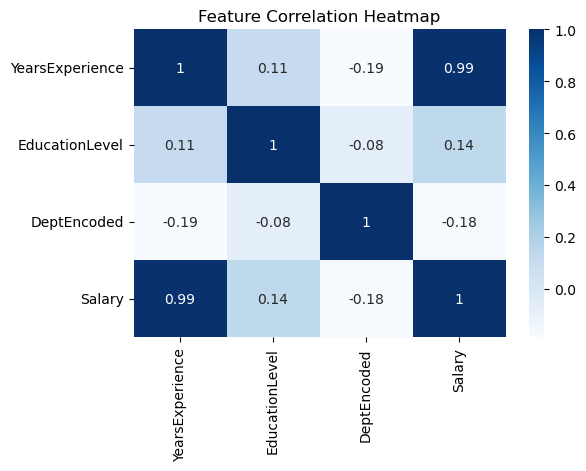

--- Random Forest ---
MAE: 2732.5
MSE: 11784175.0
R² Score: 0.9350734159779615

--- Linear Regression ---
MAE: 1814.3743522971818
MSE: 4361248.0890515465
R² Score: 0.9759710849088069

Random Forest CV Average R²: 0.757


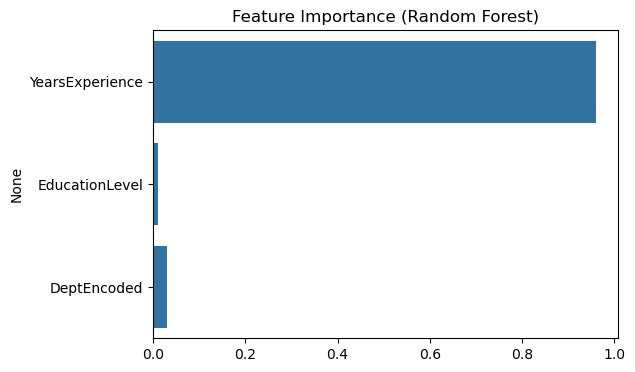

Predicted Salaries for 5 New Employees:
Employee 1: ₹37420
Employee 2: ₹48620
Employee 3: ₹54490
Employee 4: ₹59930
Employee 5: ₹67370


C:\Users\kapoo\AppData\Local\Temp\ipykernel_2556\827394557.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[f"Emp {i+1}" for i in range(5)], y=predictions, palette="mako")


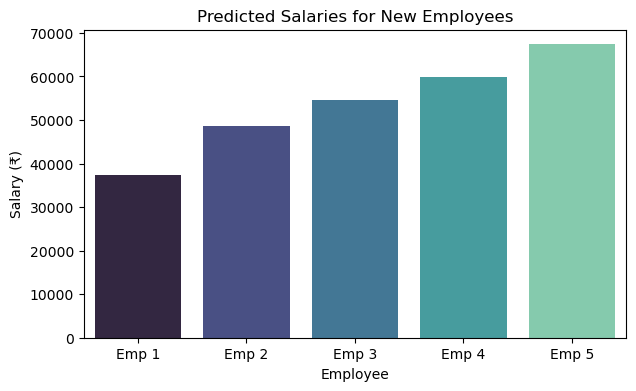

Model saved as salary_model_rf.pkl


In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

# Step 2: Create Dataset (20 entries)
data = {
    'Name': ['Amit', 'Priya', 'Rohit', 'Sneha', 'Karan', 'Pooja', 'Vikas', 'Anjali', 'Ramesh', 'Neha',
             'Rahul', 'Meena', 'Suresh', 'Kavita', 'Deepak', 'Ritu', 'Arjun', 'Tanya', 'Manish', 'Nisha'],
    'YearsExperience': [1.2, 2.5, 3.0, 4.2, 5.1, 6.0, 7.3, 8.5, 9.0, 10.1,
                        1.5, 2.7, 3.8, 4.0, 5.3, 6.7, 7.1, 8.2, 9.8, 10.5],
    'EducationLevel': [1, 2, 2, 3, 3, 1, 2, 3, 2, 1, 3, 1, 2, 2, 3, 1, 2, 3, 2, 3],
    'Department': ['HR', 'IT', 'Sales', 'IT', 'Finance', 'HR', 'IT', 'Sales', 'IT', 'Finance',
                   'HR', 'Sales', 'IT', 'Sales', 'Finance', 'IT', 'Sales', 'HR', 'Finance', 'IT'],
    'Salary': [31000, 37000, 42000, 47000, 52000, 55000, 59000, 63000, 67000, 71000,
               33000, 39000, 44000, 48000, 53000, 56000, 60000, 64000, 68000, 73000]
}
df = pd.DataFrame(data)

# Step 3: Encode Department
le = LabelEncoder()
df['DeptEncoded'] = le.fit_transform(df['Department'])

# Step 4: Prepare Input and Target
X = df[['YearsExperience', 'EducationLevel', 'DeptEncoded']]
y = df['Salary']

# Step 5: Visualize Correlation
plt.figure(figsize=(6, 4))
sns.heatmap(df[['YearsExperience', 'EducationLevel', 'DeptEncoded', 'Salary']].corr(), annot=True, cmap="Blues")
plt.title("Feature Correlation Heatmap")
plt.show()

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 8: Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 9: Evaluate Both Models
def evaluate_model(name, y_true, y_pred):
    print(f"--- {name} ---")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("R² Score:", r2_score(y_true, y_pred))
    print()

evaluate_model("Random Forest", y_test, rf_model.predict(X_test))
evaluate_model("Linear Regression", y_test, lr_model.predict(X_test))

# Step 10: Cross-validation Score
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Random Forest CV Average R²:", round(np.mean(cv_scores), 3))

# Step 11: Feature Importance
importances = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.show()

# Step 12: Predict for 5 New Employees
new_employees = pd.DataFrame({
    'YearsExperience': [2.0, 4.5, 6.2, 7.0, 9.5],
    'EducationLevel': [2, 3, 1, 2, 3],
    'DeptEncoded': [
        le.transform(['IT'])[0],
        le.transform(['HR'])[0],
        le.transform(['Finance'])[0],
        le.transform(['Sales'])[0],
        le.transform(['IT'])[0]
    ]
})
predictions = rf_model.predict(new_employees)

print("Predicted Salaries for 5 New Employees:")
for i, val in enumerate(predictions):
    print(f"Employee {i+1}: ₹{round(val)}")

# Step 13: Plot Predicted Salaries
plt.figure(figsize=(7, 4))
sns.barplot(x=[f"Emp {i+1}" for i in range(5)], y=predictions, palette="mako")
plt.title("Predicted Salaries for New Employees")
plt.ylabel("Salary (₹)")
plt.xlabel("Employee")
plt.show()

# Step 14: Save the model
joblib.dump(rf_model, "salary_model_rf.pkl")
print("Model saved as salary_model_rf.pkl")
